In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [303]:
df = pd.read_csv("Delhi.csv")

In [304]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [305]:
df.shape

(4998, 40)

In [306]:
df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [307]:
for column in df.columns :
    print(df[column].value_counts())
    print("*"*30)


Price
2500000      116
2400000       91
15500000      89
3500000       89
3000000       88
            ... 
258600000      1
6070000        1
258500000      1
2680000        1
6950000        1
Name: count, Length: 724, dtype: int64
******************************
Area
800     575
1000    439
1800    262
900     218
750     124
       ... 
1075      1
1387      1
422       1
4506      1
1275      1
Name: count, Length: 454, dtype: int64
******************************
Location
Noida                 761
Uttam Nagar           430
Dwarka Mor            347
Vasant Kunj           263
Burari                144
                     ... 
Azadpur                 1
Panchsheel Enclave      1
Janakpuri               1
Geetanjali Enclave      1
Dwarka sec 6            1
Name: count, Length: 339, dtype: int64
******************************
No. of Bedrooms
3    2277
2    1931
4     457
1     235
5      75
6      13
8       5
7       5
Name: count, dtype: int64
******************************
Resale
1    

In [308]:
df.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [309]:
 df = df[['Area','Price','Location','No. of Bedrooms','CarParking']]

In [310]:
df.head()

,Area,Price,Location,No. of Bedrooms,CarParking
0,1200,10500000,Sector 10 Dwarka,2,1
1,1000,6000000,Uttam Nagar,3,1
2,1350,15000000,Sarita Vihar,2,0
3,435,2500000,Uttam Nagar,2,1
4,900,5800000,Dwarka Mor,3,1


In [311]:
df.shape

(4998, 5)

In [312]:
df = df.rename(columns={'No. of Bedrooms': 'BHK'})
df.head()

,Area,Price,Location,BHK,CarParking
0,1200,10500000,Sector 10 Dwarka,2,1
1,1000,6000000,Uttam Nagar,3,1
2,1350,15000000,Sarita Vihar,2,0
3,435,2500000,Uttam Nagar,2,1
4,900,5800000,Dwarka Mor,3,1


In [313]:
df.describe()

,Area,Price,BHK,CarParking
count,4998.000000,4.998000e+03,4998.000000,4998.000000
mean,1277.343737,1.588638e+07,2.657863,5.490996
std,915.217800,4.612894e+07,0.820605,4.301549
min,200.000000,2.000000e+06,1.000000,0.000000
25%,800.000000,2.900000e+06,2.000000,0.000000
50%,1000.000000,5.500000e+06,3.000000,9.000000
75%,1650.000000,1.580000e+07,3.000000,9.000000
max,16000.000000,8.546000e+08,8.000000,9.000000


In [314]:
df["Location"].value_counts()

Location
Noida                 761
Uttam Nagar           430
Dwarka Mor            347
Vasant Kunj           263
Burari                144
                     ... 
Azadpur                 1
Panchsheel Enclave      1
Janakpuri               1
Geetanjali Enclave      1
Dwarka sec 6            1
Name: count, Length: 339, dtype: int64

In [315]:
Localitity_check = df["Location"].value_counts()<=5
Localitity_check.value_counts()

count
True     245
False     94
Name: count, dtype: int64

In [316]:
rare_localities = df["Location"].value_counts()[df["Location"].value_counts() <= 5].index
df["Location"] = df["Location"].apply(lambda x: 'Other' if x in rare_localities else x)


In [317]:
df["Location"].value_counts() 

Location
Noida                       761
Other                       431
Uttam Nagar                 430
Dwarka Mor                  347
Vasant Kunj                 263
                           ... 
Lajpat Nagar                  6
Gurgaon Delhi Expressway      6
Mehrauli                      6
Safdarjung Enclave            6
Civil Lines                   6
Name: count, Length: 95, dtype: int64

## Outlier removal

In [318]:
df.describe()

,Area,Price,BHK,CarParking
count,4998.000000,4.998000e+03,4998.000000,4998.000000
mean,1277.343737,1.588638e+07,2.657863,5.490996
std,915.217800,4.612894e+07,0.820605,4.301549
min,200.000000,2.000000e+06,1.000000,0.000000
25%,800.000000,2.900000e+06,2.000000,0.000000
50%,1000.000000,5.500000e+06,3.000000,9.000000
75%,1650.000000,1.580000e+07,3.000000,9.000000
max,16000.000000,8.546000e+08,8.000000,9.000000


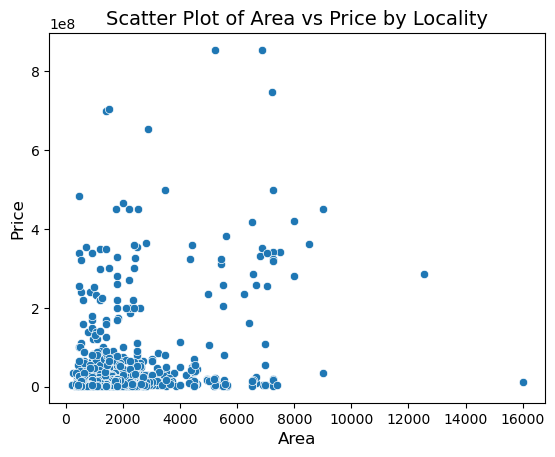

In [319]:
sns.scatterplot(data=df, x="Area", y="Price")
plt.title("Scatter Plot of Area vs Price by Locality", fontsize=14)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

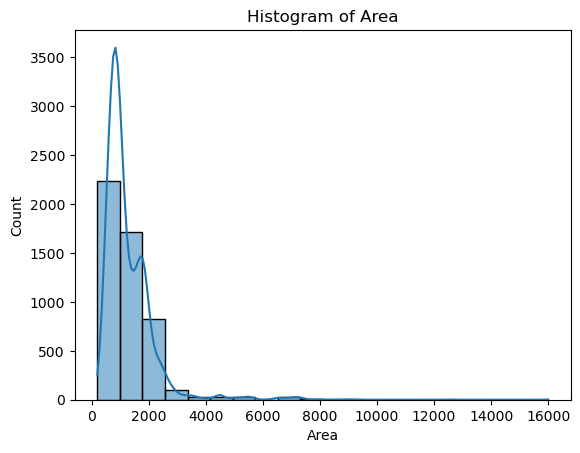

In [320]:
sns.histplot(df['Area'],bins=20,kde=True)
plt.title("Histogram of Area")
plt.show()

In [321]:
df.describe()

,Area,Price,BHK,CarParking
count,4998.000000,4.998000e+03,4998.000000,4998.000000
mean,1277.343737,1.588638e+07,2.657863,5.490996
std,915.217800,4.612894e+07,0.820605,4.301549
min,200.000000,2.000000e+06,1.000000,0.000000
25%,800.000000,2.900000e+06,2.000000,0.000000
50%,1000.000000,5.500000e+06,3.000000,9.000000
75%,1650.000000,1.580000e+07,3.000000,9.000000
max,16000.000000,8.546000e+08,8.000000,9.000000


In [322]:
df.isnull().sum()

Area          0
Price         0
Location      0
BHK           0
CarParking    0
dtype: int64

In [323]:
df["Per_Sqft"] = df["Price"]/df["Area"]

In [324]:
df.isna().sum()

Area          0
Price         0
Location      0
BHK           0
CarParking    0
Per_Sqft      0
dtype: int64

In [325]:
df.shape

(4998, 6)

In [326]:
df.Per_Sqft.describe()

count    4.998000e+03
mean     1.160134e+04
std      3.319509e+04
min      2.757100e+02
25%      3.725000e+03
50%      6.000000e+03
75%      1.000000e+04
max      1.076444e+06
Name: Per_Sqft, dtype: float64

In [327]:
from scipy.stats import zscore

df['zscore'] = zscore(df['Price'])
outliers = df[df['zscore'].abs() > 3]

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [328]:
def Outlier_persqft(df):
    df_Output = pd.DataFrame()
    for key,subdf in df.groupby("Location"):
        m = np.mean(subdf.Per_Sqft)
        st = np.std(subdf.Per_Sqft)

        gen_df = subdf[(subdf.Per_Sqft > m-0.75*st) & (subdf.Per_Sqft <= m + 0.75*st )]
        df_Output = pd.concat([df_Output,gen_df],ignore_index=True)
    return df_Output
df = Outlier_persqft(df)
df.describe()


,Area,Price,BHK,CarParking,Per_Sqft,zscore
count,3766.000000,3.766000e+03,3766.000000,3766.000000,3766.000000,3766.000000
mean,1151.667021,8.140716e+06,2.610462,4.985927,6529.636404,-0.167930
std,625.595987,6.866066e+06,0.738893,4.367581,3616.380202,0.148860
min,200.000000,2.000000e+06,1.000000,0.000000,444.444444,-0.301064
25%,800.000000,2.797500e+06,2.000000,0.000000,3639.375000,-0.283774
50%,1000.000000,4.500000e+06,3.000000,9.000000,5482.676225,-0.246863
75%,1500.000000,1.400000e+07,3.000000,9.000000,8797.674419,-0.040898
max,9000.000000,3.500000e+07,7.000000,9.000000,24561.403509,0.414393


<Axes: xlabel='Area', ylabel='Price'>

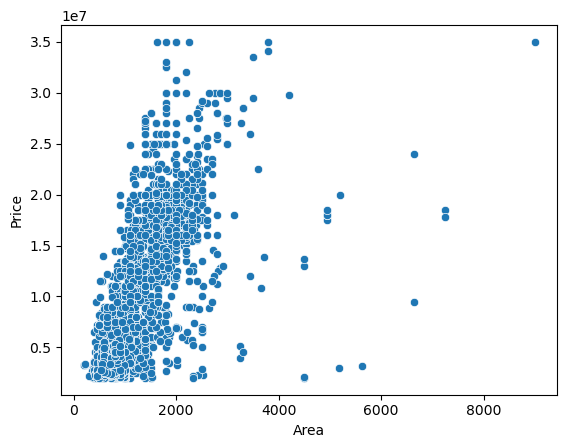

In [329]:
sns.scatterplot(data=df,x="Area",y="Price")

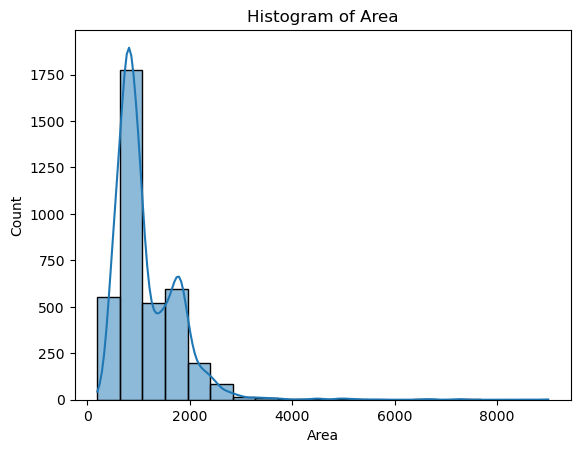

In [330]:
sns.histplot(df['Area'],bins=20,kde=True)
plt.title("Histogram of Area")
plt.show()

In [331]:
df.shape
df.head()

,Area,Price,Location,BHK,CarParking,Per_Sqft,zscore
0,1200,15500000,Alaknanda,3,0,12916.666667,-0.008377
1,1650,16399999,Alaknanda,4,0,9939.393333,0.011135
2,1300,15600000,Alaknanda,2,0,12000.000000,-0.006209
3,1450,19000000,Alaknanda,3,0,13103.448276,0.067505
4,1450,19000000,Alaknanda,3,0,13103.448276,0.067505


In [332]:
correlation = df['CarParking'].corr(df['Price'])
print(f"Correlation between Parking and Price: {correlation}")

Correlation between Parking and Price: -0.20852247017520567


In [333]:
# You can see that the correlation between parking and price is almost negligible so we can remove it
df =df.drop(columns=['CarParking','zscore'],axis=1)

In [334]:
df.shape

(3766, 5)

In [335]:
df.describe()

,Area,Price,BHK,Per_Sqft
count,3766.000000,3.766000e+03,3766.000000,3766.000000
mean,1151.667021,8.140716e+06,2.610462,6529.636404
std,625.595987,6.866066e+06,0.738893,3616.380202
min,200.000000,2.000000e+06,1.000000,444.444444
25%,800.000000,2.797500e+06,2.000000,3639.375000
50%,1000.000000,4.500000e+06,3.000000,5482.676225
75%,1500.000000,1.400000e+07,3.000000,8797.674419
max,9000.000000,3.500000e+07,7.000000,24561.403509


In [336]:
def BHK_Outlier(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('Location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
            'mean' : np.mean(bhk_df.Per_Sqft),
            'std' : np.std(bhk_df.Per_Sqft),
            'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>4:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.Per_Sqft>(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = BHK_Outlier(df)

In [337]:
df.shape

(2915, 5)

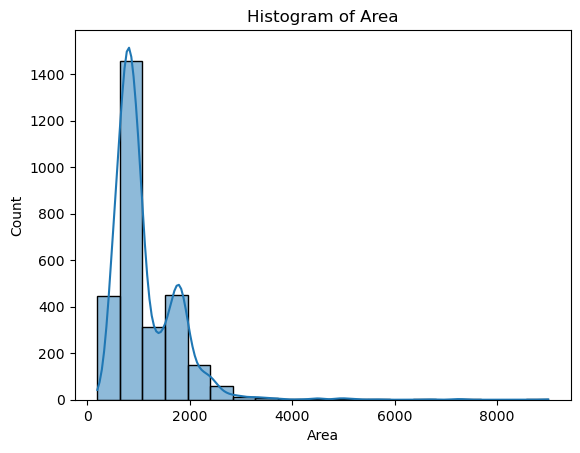

In [338]:
sns.histplot(df['Area'],bins=20,kde=True)
plt.title("Histogram of Area")
plt.show()

<Axes: xlabel='Area', ylabel='Price'>

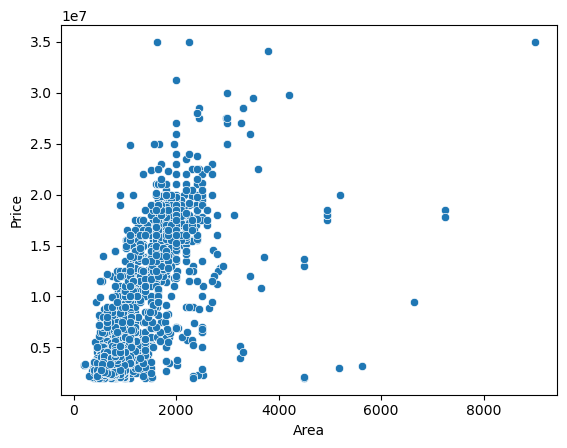

In [339]:
sns.scatterplot(data=df,x="Area",y="Price")

In [340]:
df.head()

,Area,Price,Location,BHK,Per_Sqft
1,1650,16399999,Alaknanda,4,9939.393333
2,1300,15600000,Alaknanda,2,12000.000000
5,1200,15000000,Alaknanda,2,12500.000000
6,1250,15500000,Alaknanda,2,12400.000000
9,1650,15700000,Alaknanda,3,9515.151515


In [341]:
df = df.drop(columns=['Per_Sqft'])

In [342]:
df.shape

(2915, 4)

In [343]:
from scipy.stats import zscore

df['zscore'] = zscore(df['Price'])
outliers = df[df['zscore'].abs() > 3]

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [344]:
df = df.drop(columns=['zscore'],axis=1)
rare_localities = df["Location"].value_counts()[df["Location"].value_counts() <= 5].index
df["Location"] = df["Location"].apply(lambda x: 'Other' if x in rare_localities else x)

<Axes: xlabel='Area', ylabel='Price'>

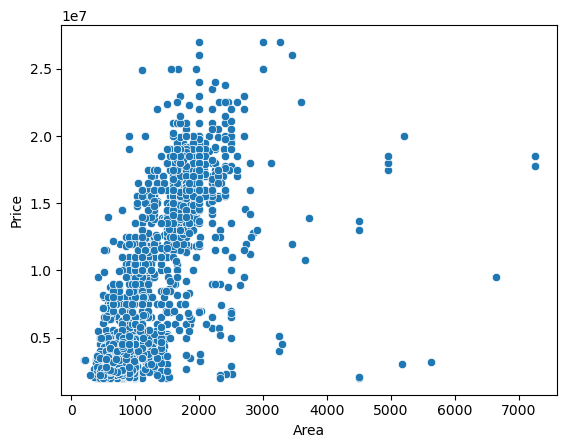

In [345]:
sns.scatterplot(data=df,x="Area",y="Price")

In [346]:
df.shape

(2899, 4)

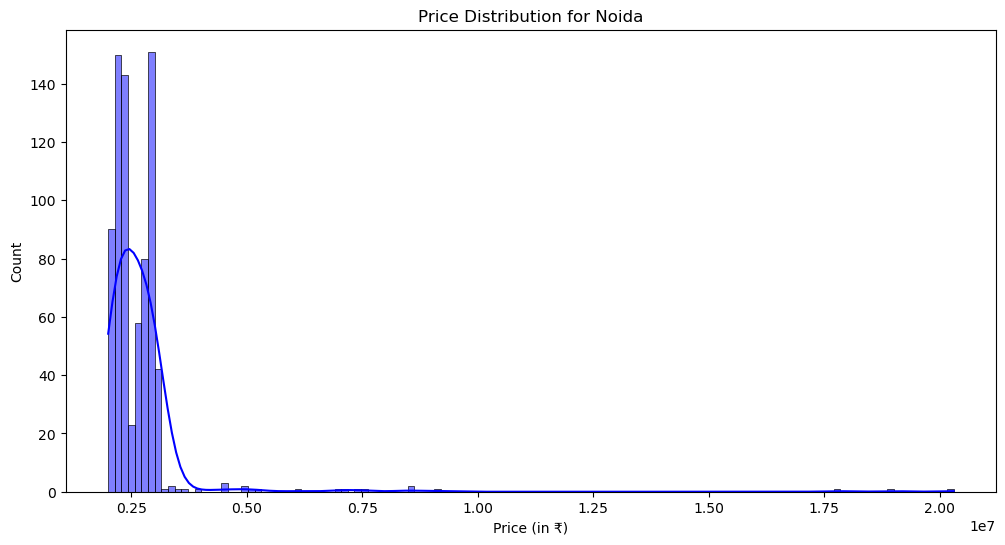

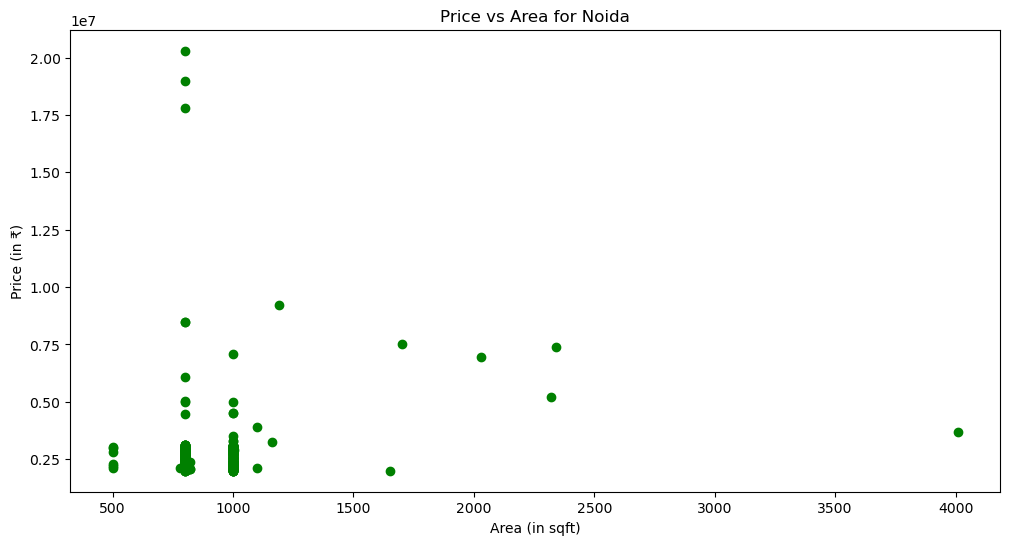

In [355]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Noida data
noida_data = df[df['Location'].str.lower() == 'noida']

# Distribution of Price
plt.figure(figsize=(12, 6))
sns.histplot(noida_data['Price'], kde=True, color='blue')
plt.title("Price Distribution for Noida")
plt.xlabel("Price (in ₹)")
plt.show()

# Scatter Plot for Price vs Area
plt.figure(figsize=(12, 6))
plt.scatter(noida_data['Area'], noida_data['Price'], color='green')
plt.title("Price vs Area for Noida")
plt.xlabel("Area (in sqft)")
plt.ylabel("Price (in ₹)")
plt.show()


# Making the Model

In [347]:
X = df.drop(columns=['Price'])
y = df['Price']

In [348]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [349]:
print(X_train.shape)
print(y_train.shape)

(2319, 3)
(2319,)


In [350]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


In [356]:
column_transform = make_column_transformer((OneHotEncoder(sparse_output=False),['Location']))

In [352]:
scaler = StandardScaler()

In [286]:
lr = LinearRegression()

In [287]:
pipe = make_pipeline(column_transform,scaler,lr)

In [288]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [289]:
y_pred = pipe.predict(X_test)

In [290]:
r2_score(y_test, y_pred)  

0.8071725062337516

In [291]:
from sklearn.linear_model import Ridge,Lasso

ridge = Lasso()
pipe = make_pipeline(column_transform,scaler,ridge)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+14, tolerance: 8.222e+12
  model = cd_fast.enet_coordinate_descent(


0.8063902974500157

In [292]:
import joblib
joblib.dump(pipe,open('delhi_house_pricing.pkl','wb'))

In [294]:
X_train.head()

,Area,Location,BHK
2839,1700,Sector 4 Dwarka,3
262,1025,Chittaranjan Park,3
1232,1000,Noida,3
2900,1800,Sector 5 Dwarka,3
1113,800,Noida,2


In [298]:
X_train['Location'].value_counts()

Location
Noida               584
Uttam Nagar         215
Other               194
Dwarka Mor          101
Vasant Kunj          76
                   ... 
Sector 15 Rohini      5
Vikas Puri            4
Moti Nagar            4
Munirka               4
Kalkaji               4
Name: count, Length: 72, dtype: int64